# STEP 0. 필요 모듈 임포트

In [1]:
# 0. 필요한 모듈 임포트

import tensorflow as tf
# tf.debugging.set_log_device_placement(True)
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image
import random

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

# STEP 1. 도입전 기본처리



In [2]:
# MNIST 데이터 살펴보기
mnist = keras.datasets.mnist
((train_images, train_labels), (test_images, test_labels)) = mnist.load_data()

In [3]:
# 데이터 Shape 확인하기
print("train_images 데이터 shape : {}".format(train_images.shape))
print("train_labels 데이터 shape : {}".format(train_labels.shape))
print("test_images 데이터 shape : {}".format(test_images.shape))
print("test_labels 데이터 shape : {}".format(test_labels.shape))

train_images 데이터 shape : (60000, 28, 28)
train_labels 데이터 shape : (60000,)
test_images 데이터 shape : (10000, 28, 28)
test_labels 데이터 shape : (10000,)


image lable : 3


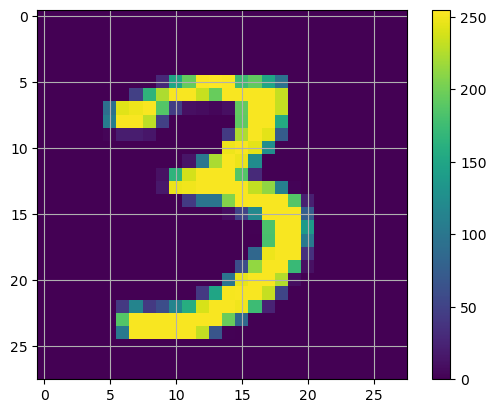

In [4]:
# (28, 28) 형태의 이미지를 plt를 이용하여 출력
index = 10000
image = train_images[index]
lable = train_labels[index]

plt.figure()
plt.imshow(image)
plt.colorbar()
plt.grid(True)
plt.show
print("image lable : {}".format(lable))

In [5]:
# train_images에서 0이 아닌 값들을 출력
list(filter(lambda x : x != 0, image.reshape(-1)))[:10]

[29, 150, 195, 254, 255, 254, 176, 193, 150, 96]

In [6]:
# train_images의 dtype을 출력
print("train_images 데이터 type : {}".format(train_images.dtype))
print("train_labels 데이터 type : {}".format(train_labels.dtype))
print("test_images 데이터 type : {}".format(test_images.dtype))
print("test_labels 데이터 type : {}".format(test_labels.dtype))

train_images 데이터 type : uint8
train_labels 데이터 type : uint8
test_images 데이터 type : uint8
test_labels 데이터 type : uint8


# STEP 2. 데이터 전처리

In [7]:
#  train/test 이미지 데이터 범위 확인
print(list(filter(lambda x : x != 0, train_images[0].reshape(-1)))[:10])
print(list(filter(lambda x : x != 0, train_labels.reshape(-1)))[:10])
print(list(filter(lambda x : x != 0, test_images[0].reshape(-1)))[:10])
print(list(filter(lambda x : x != 0, test_labels.reshape(-1)))[:10])

[3, 18, 18, 18, 126, 136, 175, 26, 166, 255]
[5, 4, 1, 9, 2, 1, 3, 1, 4, 3]
[84, 185, 159, 151, 60, 36, 222, 254, 254, 254]
[7, 2, 1, 4, 1, 4, 9, 5, 9, 6]


In [8]:
# train/test 이미지 데이터의 최소/최대값을 출력
print(train_images.reshape((60000, 28*28)).shape)  # 60000개의 이미지
print(train_images.reshape(-1).shape)              # 1원 행렬로 변환
print("tranin, test 이미지 데이터 최대값 : {}, {}".format(max(train_images.reshape(-1)), max(test_images.reshape(-1))))
print("tranin, test 이미지 데이터 최소값 : {}, {}".format(min(train_images.reshape(-1)), min(test_images.reshape(-1))))
print("tranin, test lable 데이터 최대값 : {}, {}".format(max(train_labels.reshape(-1)), max(test_labels.reshape(-1))))
print("tranin, test lable 데이터 최소값 : {}, {}".format(min(train_labels.reshape(-1)), min(test_labels.reshape(-1))))

(60000, 784)
(47040000,)
tranin, test 이미지 데이터 최대값 : 255, 255
tranin, test 이미지 데이터 최소값 : 0, 0
tranin, test lable 데이터 최대값 : 9, 9
tranin, test lable 데이터 최소값 : 0, 0


In [9]:
# 정수형을 실수형으로 변경 후 dtype 비교
train_images = train_images.astype(np.float64)
test_images = test_images.astype(np.float64)

In [10]:
# 데이터 Normalize 수행
train_images = train_images / 255 # min 0, max 255임을 알고 있기 때문에
test_images = test_images /255 # min 0, max 255임을 알고 있기 때문에

print(list(filter(lambda x : x != 0, train_images[0].reshape(-1)))[:10])
print(list(filter(lambda x : x != 0, train_labels.reshape(-1)))[:10])
print(list(filter(lambda x : x != 0, test_images[0].reshape(-1)))[:10])
print(list(filter(lambda x : x != 0, test_labels.reshape(-1)))[:10])
print("train_images 데이터 type : {}".format(train_images.dtype))
print("train_labels 데이터 type : {}".format(train_labels.dtype))
print("test_images 데이터 type : {}".format(test_images.dtype))
print("test_labels 데이터 type : {}".format(test_labels.dtype))

[0.011764705882352941, 0.07058823529411765, 0.07058823529411765, 0.07058823529411765, 0.49411764705882355, 0.5333333333333333, 0.6862745098039216, 0.10196078431372549, 0.6509803921568628, 1.0]
[5, 4, 1, 9, 2, 1, 3, 1, 4, 3]
[0.32941176470588235, 0.7254901960784313, 0.6235294117647059, 0.592156862745098, 0.23529411764705882, 0.1411764705882353, 0.8705882352941177, 0.996078431372549, 0.996078431372549, 0.996078431372549]
[7, 2, 1, 4, 1, 4, 9, 5, 9, 6]
train_images 데이터 type : float64
train_labels 데이터 type : uint8
test_images 데이터 type : float64
test_labels 데이터 type : uint8


# STEP 3. 시각화 방법

In [11]:
# train_image의 이미지를 5장 획득하여 (5,28,28)의 shape을 출력
indices = random.sample(range(len(train_images)), 5)
train_images[indices].shape


(5, 28, 28)

(28, 140)


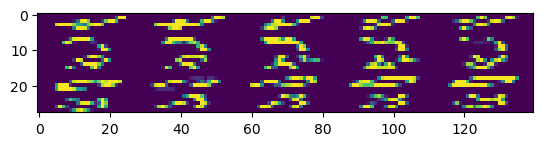

In [12]:
# 획득한 5장의 이미지를 (28,28*5)의 shape으로 변경
print(train_images[indices].reshape(28,28*5).shape)
plt.imshow(train_images[indices].reshape(28,28*5)) # 그냥 reshape으로 변환하면 imshow에서 받아들이지 못함

(28, 140)


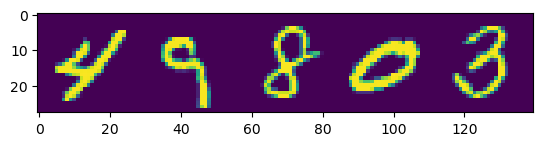

In [13]:
# hstack을 이용한 변환
print(np.hstack(train_images[indices]).shape)
plt.imshow(np.hstack(train_images[indices]))

(28, 140)
labels : [4 9 8 0 3]


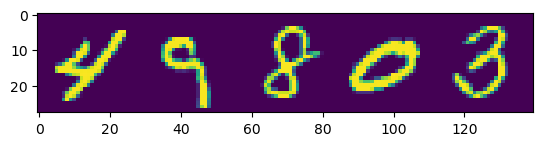

In [14]:
# np.hstack은 tensorflow에서 사용가능한 방법이 아니므로 transpose 함수를 이용하여 (28,28,5)을 변환
# numpy는 CPU 영역에서 동작하기 때문에 GPU를 최대한 활용하기 위해서는 tanspose 함수 쓰기
print(train_images[indices].transpose(1, 0, 2).reshape(28, -1).shape) # (batch, height, width) -> (height, batch, width)로 변환
plt.imshow(train_images[indices].transpose(1, 0, 2).reshape(28, -1)) # 그냥 reshape으로 변환하면 imshow에서 받아들이지 못함
print("labels : {}".format(train_labels[indices]))

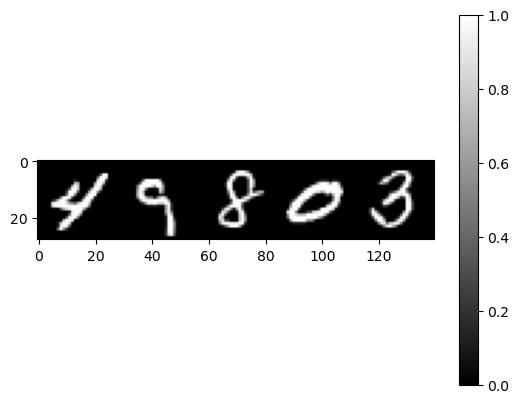

labels : [4 9 8 0 3]


In [15]:
# (20,140)이 된 tensor를 plt로 흑백으로 출력하고 해당 labels값을 print로 출력
plt.imshow(train_images[indices].transpose(1, 0, 2).reshape(28, -1), cmap="gray")
plt.colorbar()
plt.show()
print("labels : {}".format(train_labels[indices]))

# STEP 4. Data augmentation - Noise 추가 방법

In [16]:
# np.random.random 함수를 이용하여 0-1 사이의 랜덤값을 3회  print 출력
for i in range(3):
    print(np.random.random())

0.40751344198664186
0.3843975202320612
0.4122483925591881


In [17]:
# np.random.random 함수와 shape파라메터를 (28,28)의 랜덤 노이즈 생성
np.random.random((28,28)).shape

(28, 28)

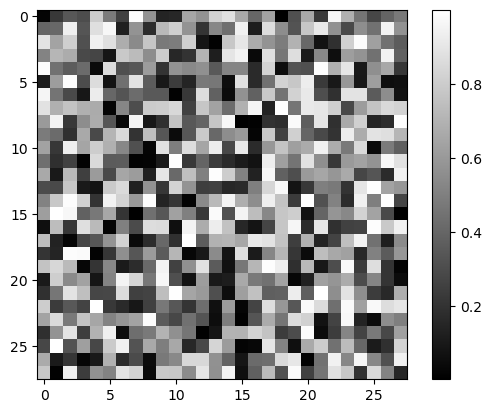

In [18]:
# 생성된 random(28,28)노이즈를 plt를 통하여 확인
plt.imshow(np.random.random((28,28)), cmap="gray")
plt.colorbar()
plt.show()

In [19]:
# 가우시안 노이즈 함수를 사용하여 평균이 0 표준편차 0.1 사이즈 1로 랜덤값을 3번 출력

for i in range(3):
    print(np.random.normal(0.0, 0.1, 1))


[-0.115959]
[-0.03781016]
[-0.11109296]


In [20]:
# 평균이 3.0인 경우와 표준편차가 0.01인 경우 각각 3회씩 출력
for i in range(3):
    print(np.random.normal(3.0, 0.1, 1))
    
for i in range(3):
    print(np.random.normal(0.0, 0.01, 1))

[3.08443046]
[2.97521907]
[3.02092829]
[0.00065151]
[-0.00375745]
[0.01188718]


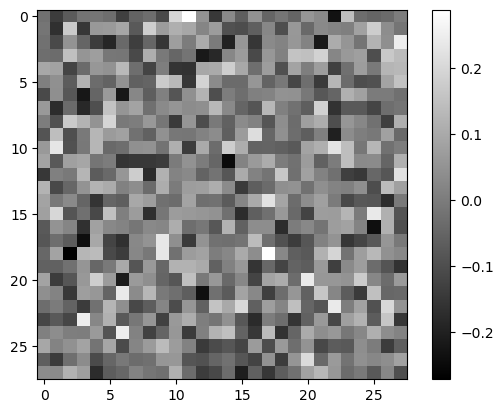

In [21]:
# 가우시안 노이즈 함수를 옵션으로 size(28,28)로 생성 후 plt 출력
plt.imshow(np.random.normal(0.0, 0.1, (28,28)), cmap="gray")
plt.colorbar()
plt.show()

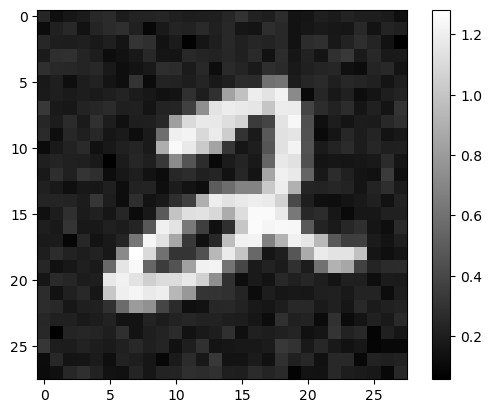

In [22]:
# train_image와 가우시안노이즈를 더한 tensor를 noisy_image변수에 할당 후 
noisy_image = train_images[5] + np.random.normal(0.2, 0.05, (28,28)) # 노이즈의 평균과 표준편차에 따라 정도가 다름

plt.imshow(noisy_image, cmap="gray")
plt.colorbar()
plt.show()

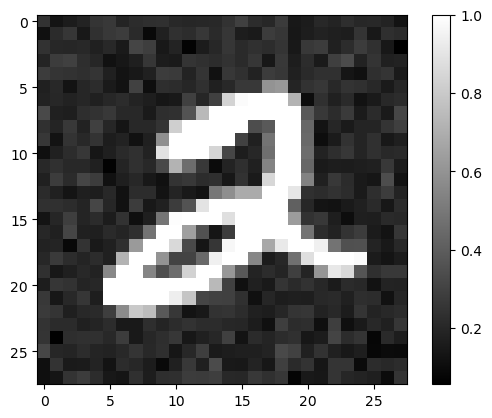

In [23]:
# max 가 1을 넘지 않게 최대값 조절
noisy_image[noisy_image > 1.0] = 1.0  # 엄밀한 의미에서 normalize아니지만 그냥 간단하게 한번 해봄



plt.imshow(noisy_image, cmap="gray")
plt.colorbar()
plt.show()

In [24]:
# 위의 컨셉을 활용하여, train_images와 test_images 데이터에 랜점 노이즈를 추가한 데이터 생성
train_noisy_images = train_images + np.random.normal(0.5, 0.1, train_images.shape)
train_noisy_images[train_noisy_images > 1.0] = 1.0

test_noisy_images = test_images + np.random.normal(0.5, 0.1, test_images.shape)
test_noisy_images[test_noisy_images > 1.0] = 1.0


In [25]:
# labels에 onehot 인코딩을 적용하여 shape 변경
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

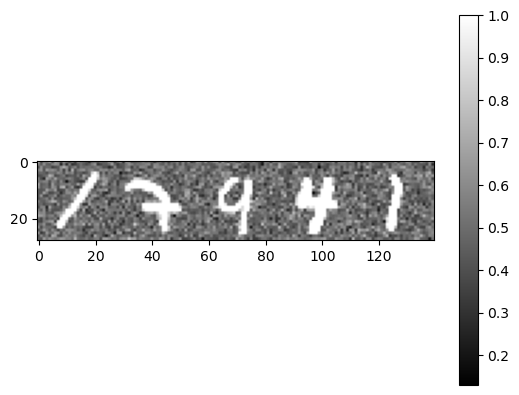

labels : [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [26]:
indices = random.sample(range(len(train_images)), 5)
plt.imshow(train_noisy_images[indices].transpose(1, 0, 2).reshape(28, -1), cmap="gray")
plt.colorbar()
plt.show()
print("labels : {}".format(train_labels[indices]))

# STEP 5. 모델링

In [27]:
# 학습 데이터셋을 처리하는 이미지 classification 모델을 작성 -> 64 unit의 SimpleRNN, 10 unit의 fully-connect가진
from keras.layers import SimpleRNN
from keras.layers import Dense, Input
from keras.models import Model

inputs = Input(shape=(28,28))
x1 = SimpleRNN(64, activation="tanh")(inputs)
x2 = Dense(10, activation="softmax")(x1)
model = Model(inputs, x2)


In [28]:
# 모델 요약 정보를 출력
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                5952      
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 6,602
Trainable params: 6,602
Non-trainable params: 0
_________________________________________________________________


In [29]:
# 모델에 loss와 optimizer, metric설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [30]:
# 만든 모델에 데이터 학습
hist = model.fit(train_noisy_images, train_labels, validation_data=(test_noisy_images, test_labels), epochs=5, verbose=2)

Epoch 1/5
1875/1875 - 6s - loss: 0.7144 - accuracy: 0.7737 - val_loss: 0.4418 - val_accuracy: 0.8651 - 6s/epoch - 3ms/step
Epoch 2/5
1875/1875 - 5s - loss: 0.3787 - accuracy: 0.8855 - val_loss: 0.3334 - val_accuracy: 0.9037 - 5s/epoch - 3ms/step
Epoch 3/5
1875/1875 - 5s - loss: 0.3108 - accuracy: 0.9069 - val_loss: 0.3166 - val_accuracy: 0.9063 - 5s/epoch - 3ms/step
Epoch 4/5
1875/1875 - 5s - loss: 0.2792 - accuracy: 0.9171 - val_loss: 0.2347 - val_accuracy: 0.9307 - 5s/epoch - 3ms/step
Epoch 5/5
1875/1875 - 5s - loss: 0.2542 - accuracy: 0.9242 - val_loss: 0.2376 - val_accuracy: 0.9312 - 5s/epoch - 3ms/step


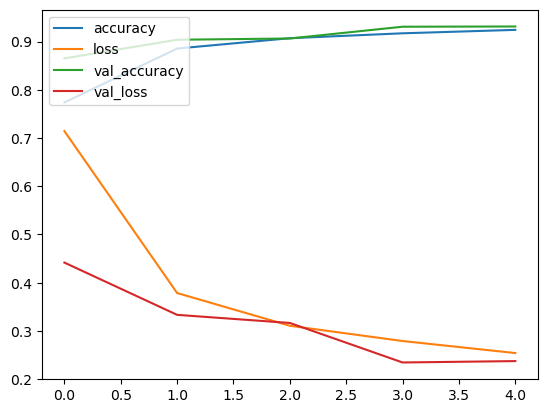

In [31]:
# hist의  accuracy plot의 plot을 이용하여 출력
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')
plt.show()

# STEP 6. 결과확인

In [32]:
# 완성된 모델에서 test 데이터를 넣고 결과를 저장
test_noisy_images[0].shape

res = model.predict(test_noisy_images[:1]) # 방법이 여러개 있겠지만 (1,28,28)의 배치형태로 입력해야함
res

1/1 [==============================] - 0s 163ms/step


array([[3.5202258e-05, 1.6290644e-05, 8.1629349e-07, 1.4901140e-03,
        7.4520294e-06, 4.7970563e-04, 1.6585536e-06, 9.9548209e-01,
        4.0529685e-05, 2.4460845e-03]], dtype=float32)

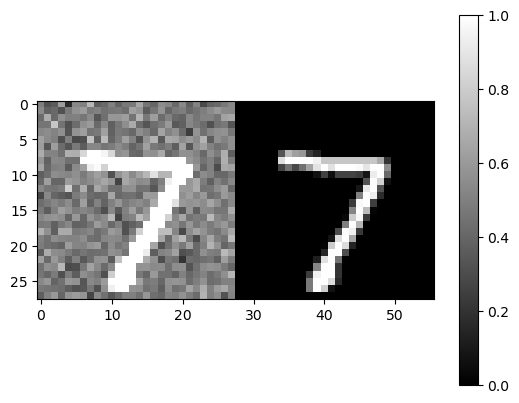

labels : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [33]:
# test_noisy_images[0], test_images[0]를 width 방향으로 (28, 28 * 2)결합해 plt 출력
np.concatenate([test_noisy_images[0], test_images[0]], axis=1)

plt.imshow(np.concatenate([test_noisy_images[0], test_images[0]], axis=1), cmap="gray")
plt.colorbar()
plt.show()
print("labels : {}".format(test_labels[0]))

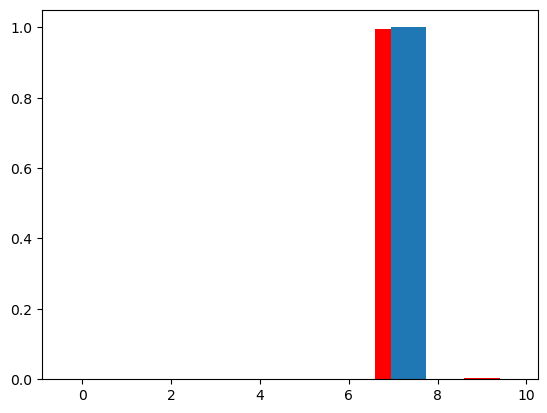

In [34]:
# res와 test_labels[0]의 결과를 plt.bar로 확인

plt.bar(np.array(range(10)),res[0], color = 'red')
plt.bar(np.array(range(10))+0.35,test_labels[0])

plt.show()

# STEP 7. 모델저장 및 로드, 다운

In [35]:
# 모델을 저장
model.save("DL_Model/03_DL_01_model.h5")

In [36]:
# 모델을 로드
new_model = tf.keras.models.load_model('DL_Model/03_DL_01_model.h5')

1/1 [==============================] - 0s 135ms/step


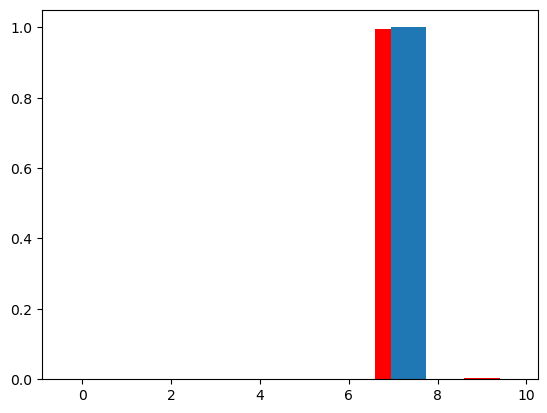

In [37]:
#로드한 모델을 test 데이터로 평가
res = new_model.predict(test_noisy_images[:1]) # 방법이 여러개 있겠지만 (1,28,28)의 배치형태로 입력해야함
res.shape
plt.bar(np.array(range(10)),res[0], color = 'red')
plt.bar(np.array(range(10))+0.35,test_labels[0])

plt.show()

In [38]:
# 로드한 모델을 test데이터로 평가
loss, acc = new_model.evaluate(test_noisy_images, test_labels, verbose=2)
print(loss, acc)
loss, acc = model.evaluate(test_noisy_images, test_labels, verbose=2)
print(loss, acc)


313/313 - 1s - loss: 0.2376 - accuracy: 0.9312 - 616ms/epoch - 2ms/step
0.23758788406848907 0.9312000274658203
313/313 - 0s - loss: 0.2376 - accuracy: 0.9312 - 412ms/epoch - 1ms/step
0.23758788406848907 0.9312000274658203


In [39]:
#모델을 컴퓨터에 저장

In [40]:
import h5py

file_path = './03_DL_01_model.h5'

try:
    with h5py.File(file_path, 'r') as f:
        print("File successfully opened!")
        print("Keys in the file:", list(f.keys()))
        print("Model config:", f.attrs.get('model_config'))
except Exception as e:
    print(f"Error reading HDF5 file: {e}")
    


Error reading HDF5 file: [Errno 2] Unable to open file (unable to open file: name = './03_DL_01_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


In [41]:
import h5py
print("h5py version:", h5py.__version__)

h5py version: 3.6.0


In [42]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.0
